In [2]:
import requests
import json
import pandas as pd
import seaborn as sns

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import cx_Oracle

In [6]:
custom_header ={
    'referer' : 'https://upbit.com/exchange?code=CRIX.UPBIT.KRW-BTC',
    'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
}

url = 'https://crix-api-cdn.upbit.com/v1/crix/candles/lines?code=CRIX.UPBIT.KRW-BTC'
requests.get
req = requests.get(url, headers = custom_header)
# req = requests.get(url)

In [7]:
# https://crix-api-cdn.upbit.com/v1/crix/candles/minutes/30?code=CRIX.UPBIT.KRW-BTC

In [8]:
print(req.status_code)
if req.status_code == requests.codes.ok:
    print("접속 성공")
    realtime_data = json.loads(req.text)
    print(realtime_data)

200
접속 성공
{'unit': 15, 'businessTime': {'opening': '00:00:00', 'closing': '23:59:59'}, 'prevClosingPrice': 21201000.0, 'candles': [{'candleDateTime': '2022-12-30T07:15:00+00:00', 'candleDateTimeKst': '2022-12-30T16:15:00+09:00', 'openingPrice': 20945000.0, 'highPrice': 20947000.0, 'lowPrice': 20908000.0, 'tradePrice': 20911000.0, 'candleAccTradeVolume': 28.91763374, 'candleAccTradePrice': 604966972.98065, 'timestamp': 1672384813817, 'code': 'CRIX.UPBIT.KRW-BTC', 'unit': 15}, {'candleDateTime': '2022-12-30T07:00:00+00:00', 'candleDateTimeKst': '2022-12-30T16:00:00+09:00', 'openingPrice': 20966000.0, 'highPrice': 20966000.0, 'lowPrice': 20916000.0, 'tradePrice': 20946000.0, 'candleAccTradeVolume': 100.55795506, 'candleAccTradePrice': 2105405144.40649, 'timestamp': 1672384499185, 'code': 'CRIX.UPBIT.KRW-BTC', 'unit': 15}, {'candleDateTime': '2022-12-30T06:45:00+00:00', 'candleDateTimeKst': '2022-12-30T15:45:00+09:00', 'openingPrice': 20995000.0, 'highPrice': 21001000.0, 'lowPrice': 209640

In [6]:
realtime_data['candles']

[{'candleDateTime': '2022-12-30T06:45:00+00:00',
  'candleDateTimeKst': '2022-12-30T15:45:00+09:00',
  'openingPrice': 20995000.0,
  'highPrice': 21001000.0,
  'lowPrice': 20964000.0,
  'tradePrice': 20967000.0,
  'candleAccTradeVolume': 31.21428345,
  'candleAccTradePrice': 654869690.27871,
  'timestamp': 1672383459929,
  'code': 'CRIX.UPBIT.KRW-BTC',
  'unit': 15},
 {'candleDateTime': '2022-12-30T06:30:00+00:00',
  'candleDateTimeKst': '2022-12-30T15:30:00+09:00',
  'openingPrice': 21003000.0,
  'highPrice': 21010000.0,
  'lowPrice': 20982000.0,
  'tradePrice': 21000000.0,
  'candleAccTradeVolume': 37.86774407,
  'candleAccTradePrice': 795078782.3397,
  'timestamp': 1672382699635,
  'code': 'CRIX.UPBIT.KRW-BTC',
  'unit': 15},
 {'candleDateTime': '2022-12-30T06:15:00+00:00',
  'candleDateTimeKst': '2022-12-30T15:15:00+09:00',
  'openingPrice': 21002000.0,
  'highPrice': 21021000.0,
  'lowPrice': 20977000.0,
  'tradePrice': 21003000.0,
  'candleAccTradeVolume': 51.07034413,
  'candleA

In [9]:
# 'candleDateTimeKst': '2022-12-30T15:00:00+09:00' 시간
# 'tradePrice': 21012000.0 거래금액
# 'candleAccTradeVolume': 112.60155859 거래량
# 'timestamp': 1672380642597 

In [16]:
all_data = []
for a in realtime_data['candles']:
    data = []
    
    data.append(a['candleDateTimeKst'])
    data.append(a['tradePrice'])
    data.append(a['candleAccTradeVolume'])
    data.append(a['timestamp'])
    
    all_data.append(data)
    
all_data

[['2022-12-30T15:45:00+09:00', 20967000.0, 31.21428345, 1672383459929],
 ['2022-12-30T15:30:00+09:00', 21000000.0, 37.86774407, 1672382699635],
 ['2022-12-30T15:15:00+09:00', 21003000.0, 51.07034413, 1672381799664],
 ['2022-12-30T15:00:00+09:00', 21003000.0, 125.40904035, 1672380899576],
 ['2022-12-30T14:45:00+09:00', 21011000.0, 80.01898814, 1672379999202],
 ['2022-12-30T14:30:00+09:00', 21071000.0, 31.22263103, 1672379099748],
 ['2022-12-30T14:15:00+09:00', 21101000.0, 22.86953983, 1672378199152],
 ['2022-12-30T14:00:00+09:00', 21125000.0, 27.99975142, 1672377286671],
 ['2022-12-30T13:45:00+09:00', 21103000.0, 15.27085169, 1672376398979],
 ['2022-12-30T13:30:00+09:00', 21115000.0, 18.43172722, 1672375494376],
 ['2022-12-30T13:15:00+09:00', 21092000.0, 27.4795714, 1672374597363],
 ['2022-12-30T13:00:00+09:00', 21119000.0, 19.20906703, 1672373698421],
 ['2022-12-30T12:45:00+09:00', 21145000.0, 22.34004704, 1672372785217],
 ['2022-12-30T12:30:00+09:00', 21140000.0, 17.59498365, 16723718

In [22]:
data_df = pd.DataFrame(data = all_data, columns = ['candleDateTimeKst','tradePrice','candleAccTradeVolume','timestamp'])

data_df

,candleDateTimeKst,tradePrice,candleAccTradeVolume,timestamp
0,2022-12-30T15:45:00+09:00,20967000.0,31.214283,1672383459929
1,2022-12-30T15:30:00+09:00,21000000.0,37.867744,1672382699635
2,2022-12-30T15:15:00+09:00,21003000.0,51.070344,1672381799664
3,2022-12-30T15:00:00+09:00,21003000.0,125.409040,1672380899576
4,2022-12-30T14:45:00+09:00,21011000.0,80.018988,1672379999202
5,2022-12-30T14:30:00+09:00,21071000.0,31.222631,1672379099748
6,2022-12-30T14:15:00+09:00,21101000.0,22.869540,1672378199152
7,2022-12-30T14:00:00+09:00,21125000.0,27.999751,1672377286671
8,2022-12-30T13:45:00+09:00,21103000.0,15.270852,1672376398979
9,2022-12-30T13:30:00+09:00,21115000.0,18.431727,1672375494376


In [ ]:
# def plt_update(ax):
#     cur.execute("""select * from air_temp where 관측소명 = '인천' order by 관측시간""")

#     columns = ['관측소코드','관측소명', '관측시간','기온']
#     air_temp_dt01 = pd.DataFrame(cur,columns = columns)
#     ax.plot(air_temp_dt01['관측시간'],air_temp_dt01['기온'], color = 'green', label = '인천')

#     hdisplay.update(fig)

In [42]:
def plt_update(ax):
    ax.plot(data_df['candleDateTimeKst'],data_df['tradePrice'], color = 'green')

    #hdisplay.update(fig)

KeyboardInterrupt: 

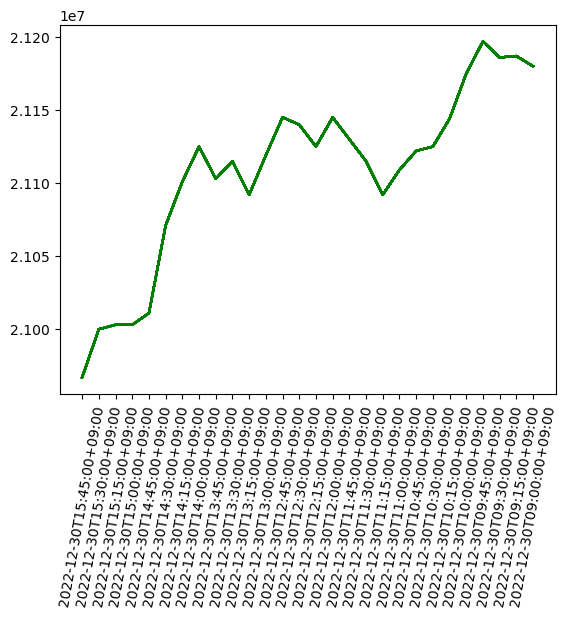

In [45]:
fig,ax = plt.subplots(1,1)
plt.xticks(rotation=80)
# plt.xlim(-2.11,-2.12)
#hdisplay = display.display("",display_id=True)

# plt_update(ax)
for f in range(100000):
    plt_update(ax)
    time.sleep(1)

plt.close()